In [1]:
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
def get_content(file):
    f = open(file)
    content = f.read()
    f.close()
    return content

In [4]:
times_sat = []
for f in glob.glob('results/result_sat_*.txt'):
    times_sat.append(eval(get_content(f)))

In [5]:
times_min = []
for f in glob.glob('results/result_min_*.txt'):
    times_min.append(eval(get_content(f)))

In [6]:
import pandas, numpy

In [7]:
def func(s):
    y = s.apply(lambda x: x["time"] if (not pandas.isna(x)) and ("time" in x) and (x["nb"] >= 80) else numpy.nan)
    return y

In [8]:
df_min = pandas.DataFrame(times_min)
df_min_time = df_min.apply(lambda x: func(x), axis=1)
df_min_time

,chuffed_int,coin-bc_int,cplex_float,cplex_int,gecode_int,gist_int,gurobi_float,gurobi_int,highs_int,sat_int,scip_float,scip_int
0,157.975,101.586,NaN,38.085,175.122,163.868,NaN,41.466,NaN,31.970,49.425,68.065
1,115.335,81.966,NaN,28.658,128.454,129.172,NaN,NaN,NaN,24.307,38.825,48.389
2,114.805,82.154,NaN,27.868,129.663,128.841,NaN,NaN,NaN,24.253,38.977,47.829
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.053,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,181.509,116.757,NaN,37.269,190.204,185.583,NaN,48.812,NaN,37.921,60.433,66.468
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.983,NaN,NaN,NaN,NaN
8,119.530,82.749,NaN,27.810,130.279,128.220,NaN,NaN,NaN,24.249,41.467,45.528
9,116.524,81.761,NaN,29.209,123.493,125.483,NaN,NaN,NaN,24.062,39.191,45.916


In [9]:
df_min_time.mean(axis=0)

chuffed_int     132.234125
coin-bc_int      90.587125
cplex_float            NaN
cplex_int        31.544750
gecode_int      145.490375
gist_int        144.199750
gurobi_float           NaN
gurobi_int       57.745625
highs_int              NaN
sat_int          28.038125
scip_float       45.939125
scip_int         55.259375
dtype: float64

In [10]:
df_sat = pandas.DataFrame(times_sat)
df_sat_time = df_sat.apply(lambda x: func(x), axis=1)
df_sat_time

,chuffed_int,coin-bc_int,cplex_float,cplex_int,gecode_int,gist_int,gurobi_int,highs_int,sat_int,scip_float,scip_int,gurobi_float
0,249.830,84.082,NaN,64.851,795.909,793.497,NaN,67.434,NaN,416.627,88.179,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,88.698,NaN,NaN,NaN,NaN,NaN
2,340.168,111.458,NaN,79.891,1035.806,1008.063,54.663,91.128,NaN,552.698,122.976,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,97.585,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,93.073,NaN,NaN,NaN,NaN,NaN
5,250.809,84.177,NaN,64.190,802.720,786.044,NaN,69.399,NaN,412.774,88.144,NaN
6,252.494,85.251,NaN,64.258,800.310,785.487,NaN,70.591,NaN,415.764,89.675,NaN
7,311.684,98.807,NaN,79.881,1074.312,1134.549,70.448,105.444,NaN,579.270,145.854,NaN
8,248.463,84.155,NaN,64.032,787.554,784.657,NaN,69.133,NaN,418.129,92.229,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
min_mean = df_min_time.mean(axis=0).rename(dict(map(lambda x: (x, x + '_min'), df_min_time.columns)))
sat_mean = df_sat_time.mean(axis=0).rename(dict(map(lambda x: (x, x + '_sat'), df_sat_time.columns)))
min_sd = df_min_time.std(axis=0).rename(dict(map(lambda x: (x, x + '_min'), df_min_time.columns)))
sat_sd = df_sat_time.std(axis=0).rename(dict(map(lambda x: (x, x + '_sat'), df_sat_time.columns)))

In [12]:
df = {"mean": min_mean.append(sat_mean), "sd": min_sd.append(sat_sd)}

/tmp/ipykernel_1630909/389729149.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = {"mean": min_mean.append(sat_mean), "sd": min_sd.append(sat_sd)}
/tmp/ipykernel_1630909/389729149.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = {"mean": min_mean.append(sat_mean), "sd": min_sd.append(sat_sd)}


In [13]:
df_new = pandas.DataFrame(df).T
df_new.columns = df_new.columns.str.replace("sat_","ortools_")
df_new = df_new.dropna(axis=1, how='all')
df_new

,chuffed_int_min,coin-bc_int_min,cplex_int_min,gecode_int_min,gist_int_min,gurobi_int_min,ortools_int_min,scip_float_min,scip_int_min,chuffed_int_sat,coin-bc_int_sat,cplex_int_sat,gecode_int_sat,gist_int_sat,gurobi_int_sat,highs_int_sat,scip_float_sat,scip_int_sat
mean,132.234125,90.587125,31.544750,145.490375,144.199750,57.745625,28.038125,45.939125,55.259375,271.715571,90.559714,69.052714,869.189714,869.001571,82.486429,77.804429,463.360000,103.940286
sd,24.920240,13.566833,4.473327,26.075556,23.767412,11.648877,5.272308,8.260273,10.474521,37.959536,10.626690,7.438450,127.587247,142.976718,14.948433,14.643590,71.529267,22.246256


In [22]:
df_new_nu = df_new.copy()
df_new_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], (x[1], x[2])), (x.split('_') for x in df_new.columns))))
df_join_mi = df_new_nu
df_join_mi = df_join_mi.sort_index(axis=1,level=[0,1],ascending=[True,True])
df_join_mi

chuffed                coin-bc                 cplex             \
      (int, min)  (int, sat) (int, min) (int, sat) (int, min) (int, sat)   
mean  132.234125  271.715571  90.587125  90.559714  31.544750  69.052714   
sd     24.920240   37.959536  13.566833  10.626690   4.473327   7.438450   

          gecode                    gist                 gurobi             \
      (int, min)  (int, sat)  (int, min)  (int, sat) (int, min) (int, sat)   
mean  145.490375  869.189714  144.199750  869.001571  57.745625  82.486429   
sd     26.075556  127.587247   23.767412  142.976718  11.648877  14.948433   

          highs    ortools         scip                                      
     (int, sat) (int, min) (float, min) (float, sat) (int, min)  (int, sat)  
mean  77.804429  28.038125    45.939125   463.360000  55.259375  103.940286  
sd    14.643590   5.272308     8.260273    71.529267  10.474521   22.246256

/home/maxime/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/maxime/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


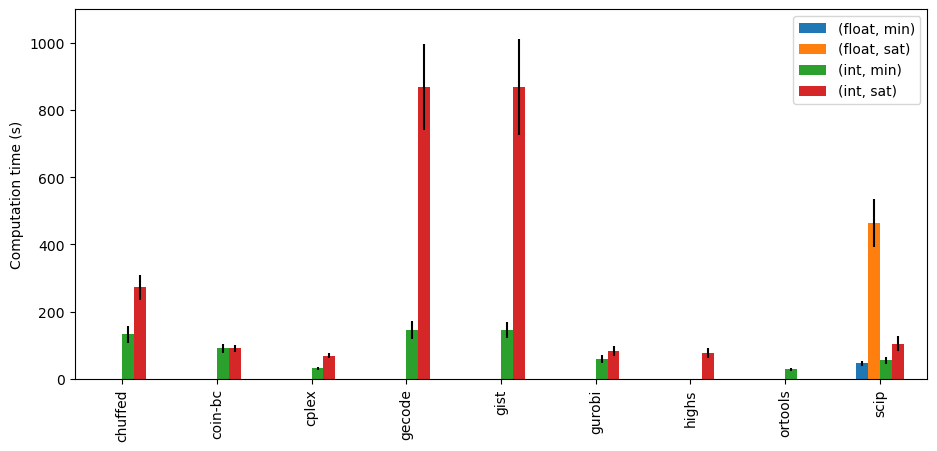

In [36]:
ax = df_join_mi.loc["mean"].unstack().plot(kind='bar', yerr=df_join_mi.loc["sd"].unstack(), figsize=(11, 4.8))
plt.ylabel('Computation time (s)')
plt.ylim(top=1100)
plt.savefig("A.pdf", bbox_inches='tight')

In [16]:
help(df_min.apply)

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type=None, args=(), **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column is passed as 

In [80]:
df_min_mi = df_min.copy()
df_min_mi.columns = pandas.MultiIndex.from_tuples([tuple(x.split('_')) for x in df_min.columns])
df_min_mi = df_min_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_min_mi

chuffed coin-bc  cplex        gecode   gist gurobi        highs    sat  \
         int     int    int  float    int    int    int  float   int    int   
nb     4.000   4.000  4.000  6.000  4.000  4.000  4.000  6.000   NaN  4.000   
time   1.018   1.255  1.285  2.088  1.061  1.187  1.336  1.927   NaN  1.124   

       scip        xpress  
        int  float    int  
nb    4.000  6.000    NaN  
time  1.712  2.458    NaN

In [82]:
df_sat = pandas.DataFrame(res_sat)
df_sat

,chuffed_int,coin-bc_int,cplex_float,cplex_int,gecode_int,gist_int,gurobi_float,gurobi_int,highs_int,sat_int,scip_float,scip_int,xpress_int
nb,4.000,5.000,47.000,5.000,4.000,4.000,NaN,NaN,4.000,0.0,5.000,7.000,NaN
time,1.254,1.894,18.362,1.897,1.385,1.397,4.5,1.25,1.699,NaN,2.631,3.208,NaN


In [83]:
df_sat_mi = df_sat.copy()
df_sat_mi.columns = pandas.MultiIndex.from_tuples([tuple(x.split('_')) for x in df_sat.columns])
df_sat_mi = df_sat_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_sat_mi

chuffed coin-bc  cplex         gecode   gist gurobi        highs  sat  \
         int     int    int   float    int    int    int float    int  int   
nb     4.000   5.000  5.000  47.000  4.000  4.000    NaN   NaN  4.000  0.0   
time   1.254   1.894  1.897  18.362  1.385  1.397   1.25   4.5  1.699  NaN   

       scip        xpress  
        int  float    int  
nb    7.000  5.000    NaN  
time  3.208  2.631    NaN

<AxesSubplot:>

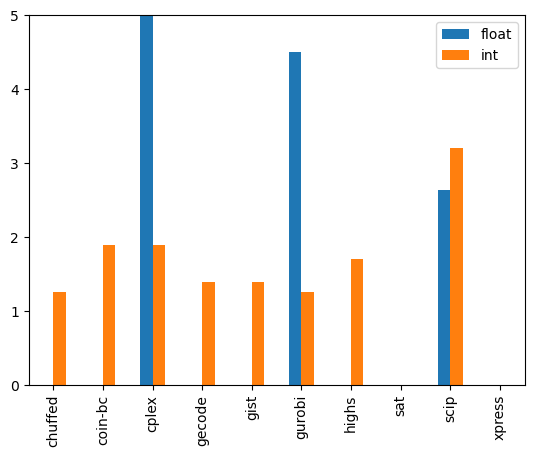

In [84]:
dfplot = df_sat_mi.loc['time'].unstack().plot(kind='bar')
plt.ylim(top=5)
dfplot

In [85]:
df_sat_nu = df_sat.copy()
df_min_nu = df_min.copy()
df_min_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_min'), (x.split('_') for x in df_min.columns))))
df_sat_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_sat'), (x.split('_') for x in df_sat.columns))))
df_join_mi = df_sat_nu.join(df_min_nu)
df_join_mi = df_join_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_join_mi

chuffed         coin-bc           cplex                              \
     int_sat int_min int_sat int_min int_sat int_min float_sat float_min   
nb     4.000   4.000   5.000   4.000   5.000   4.000    47.000     6.000   
time   1.254   1.018   1.894   1.255   1.897   1.285    18.362     2.088   

      gecode          ...   highs             sat            scip          \
     int_sat int_min  ... int_sat int_min int_sat int_min int_sat int_min   
nb     4.000   4.000  ...   4.000     NaN     0.0   4.000   7.000   4.000   
time   1.385   1.061  ...   1.699     NaN     NaN   1.124   3.208   1.712   

                          xpress          
     float_sat float_min int_sat int_min  
nb       5.000     6.000     NaN     NaN  
time     2.631     2.458     NaN     NaN  

[2 rows x 26 columns]

<AxesSubplot:>

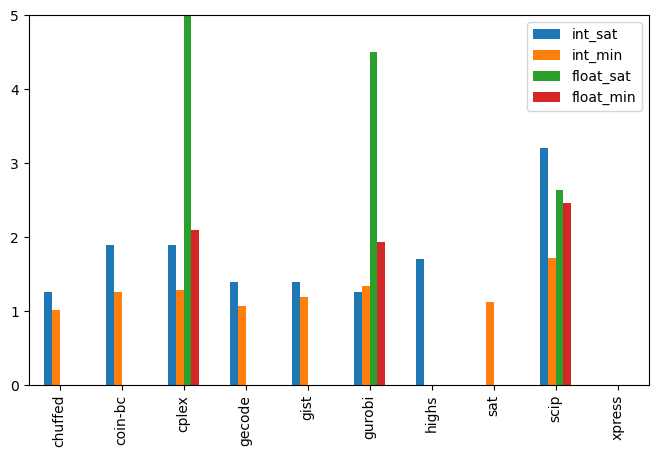

In [99]:
dfplot = df_join_mi.loc['time'].unstack()[["int_sat", "int_min", "float_sat", "float_min"]].plot(kind='bar', figsize=(8,4.8))
plt.ylim(top=5)
dfplot

In [87]:
df_join_mi[["int_sat", "int_min", "float_min", "float_sat"]]

KeyError: "['int_sat' 'int_min' 'float_min' 'float_sat'] not in index"